# Task 1 FG

## Read the network and run it on the test set


In a separate python file, read the network and run the model on the first 10 examples in the test set.

Before you run the samples through the network, make sure you set the it to evaluation mode rather than training mode (network.eval()).

In training mode the dropout layer randomly sets node values to zero.
In evaluation mode, it multiplies each value by 1-dropout rate so the same pattern will generate the same output each time.

For each example, have your program print out the 10 output values (use only 2 decimal places), the index of the max output value, and the correct label of the digit. The network should correctly classify all 10 of the examples.

Have your program also plot the first 9 digits as a 3x3 grid with the prediction for each example below it,

Include a table (or screen shot) of your printed values and the plot of the first 9 digits in your report.



In [12]:
import sys

import nbimporter
import Task1AE as networkNotebook

import torch
import torch.optim as optim

import torchvision
from torchvision import datasets, transforms

from pathlib import Path
from matplotlib import pyplot as plt


In [13]:

# A function that initilize loads the network state as it last saved
# and return the network
def load_network_state(network):

    # load the network state as we last saved them
    network_state_dict = torch.load("results/model.pth")
    network.load_state_dict(network_state_dict)
    
    # question what it the network and
    # the last saved state is not the same network?
    # its the child
    return network

In [14]:

# A function that takes in a dataloader and 
# return the first N data from the loader

def load_firstN_data(dataloader, n): 
    data, target = next(iter(dataloader))
    return data[:n]

In [15]:

# A function that takes in a network model and a dataset
# it will run the network on the data and return the output

def run_network(network, data):
    network.eval()
    with torch.no_grad():
        output = network(data)
    return output

In [16]:

# A function that takes in an output after running a network, 
# the first N input data.
# it will :
# 1. print the values of each output matrix, 
# and the index of the maximum value which will indicate the number that is predicted
# 2. plot the resulting predicion

def print_plot_output(output,firstN, n):
    # 1. print values and index of max
    for data in output.data:
        print("\n")
        meta_data = data.max(dim=0)
        formatted_list = [ '%.2f' % elem for elem in data ]
        print("values:")
        print(', '.join(formatted_list))
        print("index of max: {}".format(meta_data[1].item()))

    fig = plt.figure(figsize=(8,8))
    
    
    # 2. plot
    for i in range(n-1):
        # 1. set the fig
        plt.subplot(3, 3, i+1)
        plt.tight_layout()
        plt.imshow(firstN[i][0], cmap='gray', interpolation='none')
        
        # - get the list of prediciton and print
        preds = output.data.max(1, keepdim=True)[1]
    
        plt.title("Prediction: {}".format(
            preds[i].item()))
        
        # - remove x, y values
        plt.xticks([])
        # plt.yticks([])

    


In [17]:
def predict(network, loader, n):
    """
    A function that takes a network, a data loader and n number
    it will get the first N data from the loader and run the network with
    these data. It will then print the and plot the ouput
    
    """
    firstN = load_firstN_data(loader, n)
    output = run_network(network, firstN)
    print("data shape:", firstN.shape)
    print("output shape:", output.shape)
    print_plot_output(output, firstN, n)

In [18]:
# check the value in MNIST dataset
test_loader = networkNotebook.get_loader(is_train=False)
test_data, test_target = next(iter(test_loader))
# print(">>>>>>>>> MNIST data sample: \n", test_data[0])


## 4. Test the network on new inputs - G
Write out the ten digits [0-9] in your own handwriting on a piece of white paper (not too close together). Scale them to 28x28 and look at them to make sure the digits are visible.

In a separate file, or as the last step in your code from the prior task, read the images, convert them to greyscale, resize them to 28x28 (if necessary) and run them through the network. During the resize process, double-check that the digits are still clearly visible. Make sure to match the intensities of the new images to the intensities of the test data. Are the MNIST data set digits white on black or are the digits black on white? You may need to invert the intensities for them to match.

Display how well the network performed on this new input in your report.

In [19]:
# Check that folders are set correctly
from os import walk
for (dirpath, dirnames, filenames) in walk("images/"):
    print("Directory path: ", dirpath)
    print("Folder name: ", dirnames)

Directory path:  images/
Folder name:  ['own_greek', 'greek', 'digits', '.ipynb_checkpoints']
Directory path:  images/own_greek
Folder name:  ['.ipynb_checkpoints']
Directory path:  images/own_greek/.ipynb_checkpoints
Folder name:  []
Directory path:  images/greek
Folder name:  ['beta', 'gamma', 'alpha']
Directory path:  images/greek/beta
Folder name:  ['.ipynb_checkpoints']
Directory path:  images/greek/beta/.ipynb_checkpoints
Folder name:  []
Directory path:  images/greek/gamma
Folder name:  ['.ipynb_checkpoints']
Directory path:  images/greek/gamma/.ipynb_checkpoints
Folder name:  []
Directory path:  images/greek/alpha
Folder name:  []
Directory path:  images/digits
Folder name:  ['9', '0', '7', '6', '1', '8', '4', '3', '2', '5']
Directory path:  images/digits/9
Folder name:  []
Directory path:  images/digits/0
Folder name:  []
Directory path:  images/digits/7
Folder name:  []
Directory path:  images/digits/6
Folder name:  []
Directory path:  images/digits/1
Folder name:  []
Directo

In [20]:
import PIL.ImageOps

class NegativeMaxContrast(object):
    """Convert image to negative and Maximize contrast
    so that the lowest becomes black and the lightest becomes white

    Args:
        

    Returns:
        PIL Image: transformed version of the input.
         
    """
    def __init__(self):
        pass
    
    def __call__(self, img):
        """
        Args:
            img (PIL Image): Image to be converted.

        Returns:
            PIL Image: Negatived and contrasted image.
        """
        img = transforms.functional.adjust_contrast(img, 10)
        img = PIL.ImageOps.invert(img)
        return img




In [21]:
def check_valid(path):
    path = Path(path)
    return not path.stem.startswith('.')

def main(argv): 
    # 1. Predict MNIST first 10
    network = load_network_state(networkNotebook.NeuralNetwork()
)
    print(">>>>>>>>>>>>>> MNIST dataset prediction output:")
    test_loader = networkNotebook.get_loader(is_train=False)
    predict(network, test_loader, 10)
    
    
    # 2. Predict Own dataset
    print(">>>>>>>>>>>>>> OWN dataset prediction output:")
    # - set up the transformation for our dataset
    transform = transforms.Compose(
                [ 
                    NegativeMaxContrast(),
                    transforms.Grayscale(),
                    transforms.Resize(28),
                    transforms.ToTensor(),
                    # normalize with mean and std
                    transforms.Normalize((0.1307,), (0.3801,)),
                ])

    # - create the dataset from our images folder to datasets
    own_dataset = datasets.ImageFolder('images/digits', transform=transform, is_valid_file=check_valid)

    # - get dataloader for our 10 images
    own_loader = torch.utils.data.DataLoader(own_dataset, batch_size=10, shuffle=True)
    print(len(own_dataset))
    # check the value in OWN dataset
    own_data, own_target = next(iter(own_loader))
                 
    # - predict the first 10 data from the loader
    predict(network, own_loader, 10)
    

>>>>>>>>>>>>>> MNIST dataset prediction output:
data shape: torch.Size([10, 1, 28, 28])
output shape: torch.Size([10, 10])


values:
-24.19, -23.40, -14.99, -17.09, -25.12, -24.71, -33.98, -0.00, -22.18, -16.11
index of max: 7


values:
-12.70, -11.62, -0.00, -18.31, -14.96, -26.09, -17.58, -17.33, -12.35, -21.78
index of max: 2


values:
-15.45, -0.00, -11.24, -13.88, -11.09, -14.50, -14.51, -10.87, -9.42, -13.95
index of max: 1


values:
-0.00, -22.72, -15.39, -18.33, -20.63, -16.00, -14.85, -18.55, -16.52, -15.46
index of max: 0


values:
-21.47, -25.12, -18.50, -22.28, -0.00, -19.70, -18.03, -20.89, -14.52, -9.71
index of max: 4


values:
-17.83, -0.00, -15.20, -17.37, -11.90, -18.35, -19.38, -11.07, -12.42, -15.13
index of max: 1


values:
-23.11, -17.44, -17.37, -16.71, -0.00, -13.38, -19.55, -11.61, -8.56, -6.29
index of max: 4


values:
-21.44, -22.08, -13.99, -14.87, -6.81, -11.35, -21.70, -16.51, -11.74, -0.00
index of max: 9


values:
-19.66, -27.99, -22.19, -22.19, -21.33, 

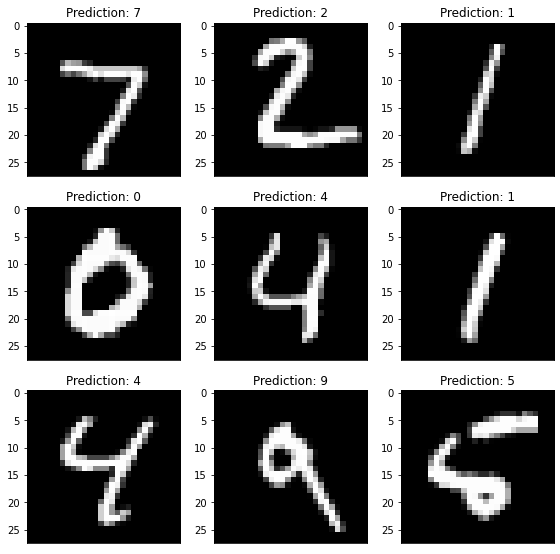

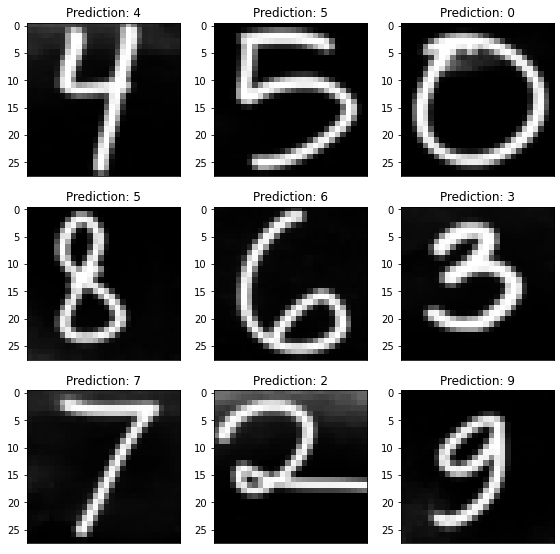

In [23]:
if __name__ == "__main__":
    main(sys.argv)

In [ ]:
# Question: why and 7 and 6 is not well detected. should i add some transform? Is it because the contrast is different? value is not the same range

In [ ]:
# Question: Whats the difference with making dataset using ImageFolder() VS creating DataSet class